# Undersand the data and utils functions

- wave_to_csv: reurn a dataframe with time stamp (based on the sameple rate) and amplitude value for each channels at that time. 
    - For Mono Audio: If the WAV file is mono (single channel), the array will be one-dimensional with shape (num_samples,). For Stereo or Multi-Channel Audio: If the WAV file has multiple channels (e.g., stereo), the array will be two-dimensional with shape (num_samples, num_channels). For stereo audio, num_channels is 2.
    - Amplitude Values: the amplitude values range between the minimum and maximum values representable by that type (e.g., -32,768 to 32,767 for int16).

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import src.label_parsing as utils

In [79]:
erocshadow_cough_wav_filepath = "data/raw/positive/coughing/108017__erocshadow__cough/data.wav"
#erocshadow_cough_wav_filepath = "data/raw/positive/coughing/mix2_cough_train/data.wav"
erocshadow_cough_df = utils.wave_to_csv(erocshadow_cough_wav_filepath)
display(erocshadow_cough_df.head())
display(erocshadow_cough_df.describe())

batch_cough_wav_filepath = "data/raw/positive/coughing_batch_2/coughconcat0/data.wav"
batch_cough_df = utils.wave_to_csv(batch_cough_wav_filepath)
#display(batch_cough_df.head())
#batch_cough_df.describe()

mic_tap_wav_filepath = "data/raw/negative/mic_tapping/studio/53586__3dward0__tabletap/data.wav"
mic_tap_df = utils.wave_to_csv(mic_tap_wav_filepath)
#display(mic_tap_df.head())
#mic_tap_df.describe()


,Time (seconds),CH0
0,0.000000,-8.0
1,0.000063,-40.0
2,0.000125,-59.0
3,0.000188,-72.0
4,0.000250,-80.0


,Time (seconds),CH0
count,87381.000000,87381.000000
mean,2.730625,7.288427
std,1.576554,3424.216391
min,0.000000,-25146.000000
25%,1.365312,-564.000000
50%,2.730625,-8.000000
75%,4.095937,557.000000
max,5.461250,24971.000000


0

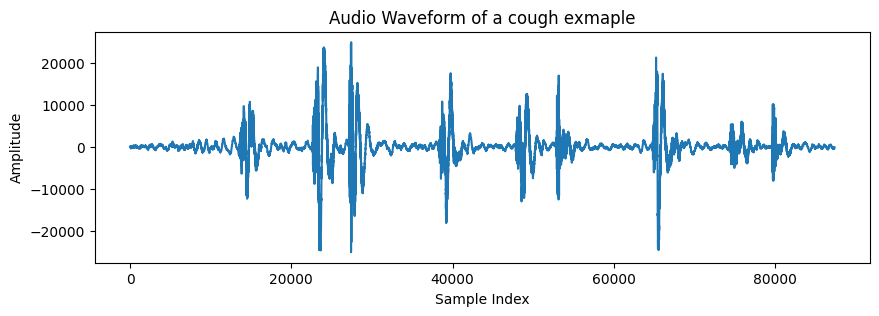

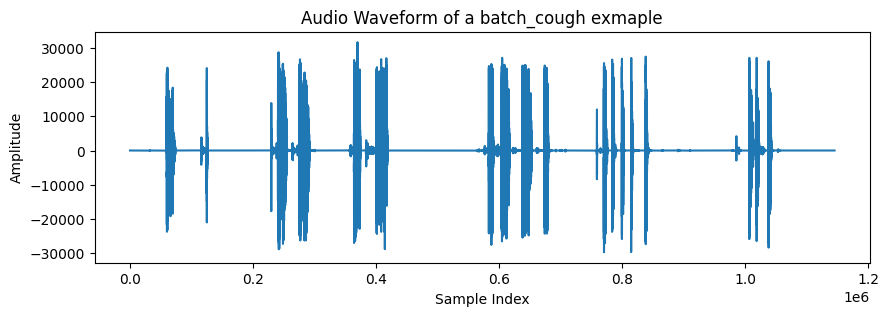

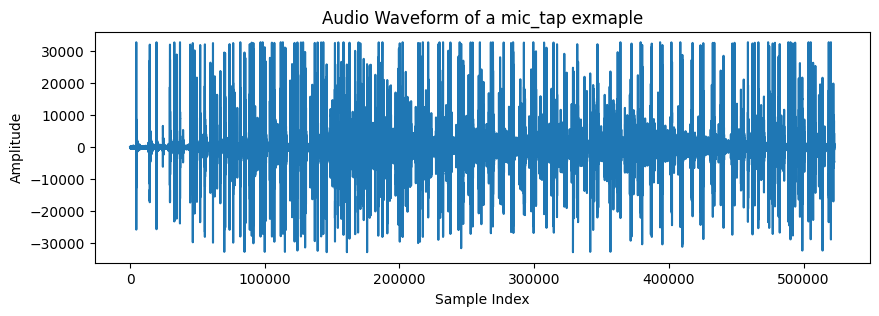

In [80]:
def plot_waveform(data_df, sameple_name):
    plt.figure(figsize=(10, 3))
    plt.plot(data_df['CH0'])
    plt.title(f'Audio Waveform of a {sameple_name} exmaple')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    return 0

plot_waveform(erocshadow_cough_df, 'cough')
plot_waveform(batch_cough_df, 'batch_cough')
plot_waveform(mic_tap_df, 'mic_tap')

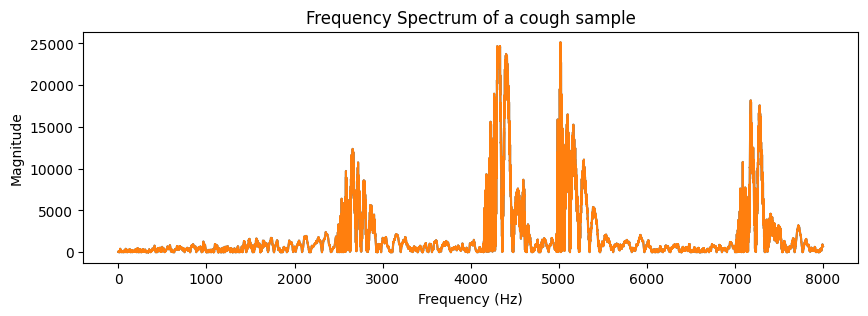

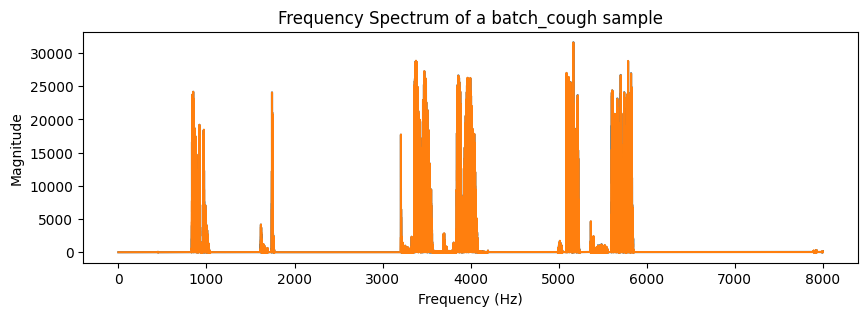

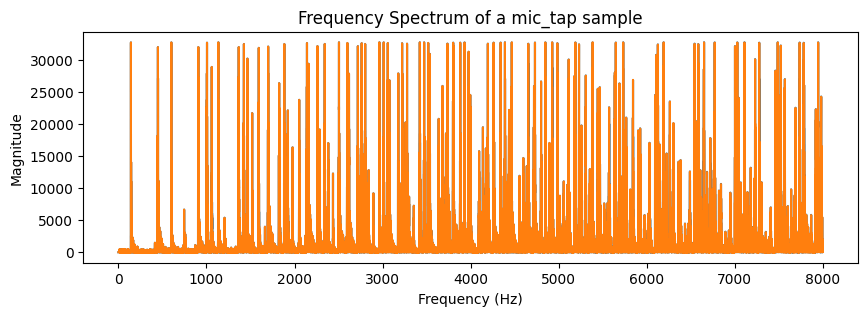

0

In [81]:
def plot_spectrum(data_df, sameple_name):
    duration = data_df.iloc[1,0]
    N = len(data_df)
    yf = fft(data_df)
    xf = fftfreq(N, duration)

    # Only take the positive frequencies
    idx = np.arange(1, N//2)

    plt.figure(figsize=(10, 3))
    plt.plot(xf[idx], np.abs(yf[idx]))
    plt.title(f'Frequency Spectrum of a {sameple_name} sample')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()
    return 0

plot_spectrum(erocshadow_cough_df, 'cough')
plot_spectrum(batch_cough_df, 'batch_cough')
plot_spectrum(mic_tap_df, 'mic_tap')

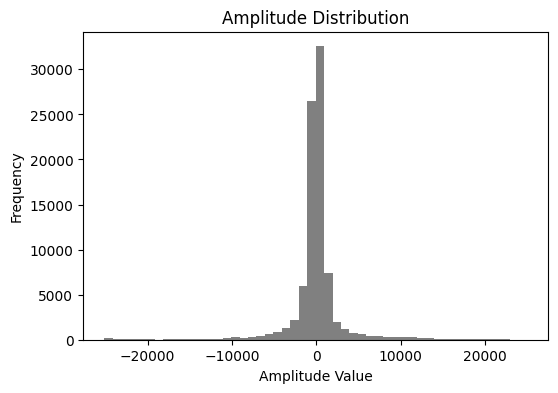

In [82]:
# Plot a histogram
plt.figure(figsize=(6, 4))
plt.hist(erocshadow_cough_df['CH0'], bins=50, color='gray')
plt.title('Amplitude Distribution')
plt.xlabel('Amplitude Value')
plt.ylabel('Frequency')
plt.show()


In [84]:
erocshadow_cough_label_filepath = "data/raw/positive/coughing/108017__erocshadow__cough/label.label"
erocshadow_cough_label_df = pd.read_csv(erocshadow_cough_label_filepath)
erocshadow_cough_label_vector_df = utils.convert_track_to_label(erocshadow_cough_df, erocshadow_cough_label_df)
len(erocshadow_cough_label_vector_df)

87381

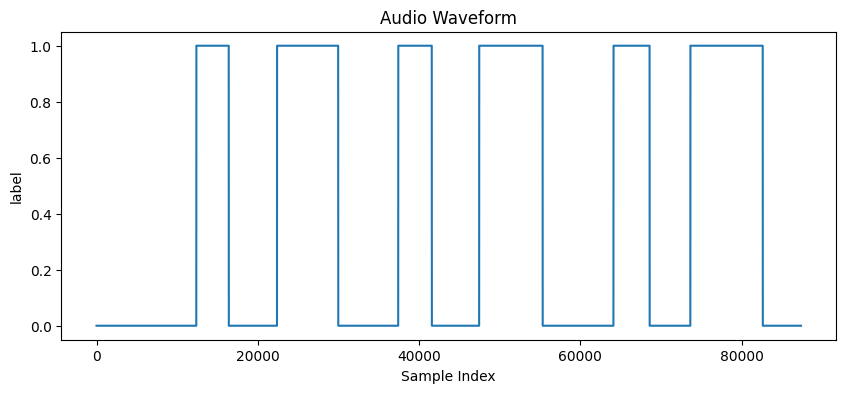

In [85]:
# Plot the label
plt.figure(figsize=(10, 4))
plt.plot(erocshadow_cough_label_vector_df)
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('label')
plt.show()